#고양이 수염 만들기.

In [22]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

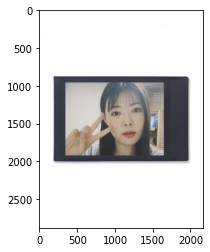

In [2]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.png'
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BRG > RGB로 변경
plt.imshow(img_rgb)
plt.show()

In [18]:
# detector를 선언
detector_hog = dlib.get_frontal_face_detector()

In [19]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

rectangles[[(849, 1220) (1404, 1774)]]


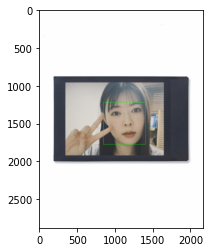

In [5]:
# 찾은 얼굴 영역 박스 리스트

print(dlib_rects)   

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [20]:
#dlib에서 제공되는 weighte file 사용해 landmark모델 저장
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


In [8]:
list_landmarks = []
#landmark_predictor은 RGB이미지와 dlib.rectangle 받아서 dlib.full_object_detection반환
# 얼굴 영역 박스 마다 face landmark를 찾기
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect) #RGB이미지와 dlib.rectangle 받음
    # face landmark 좌표를 저장
     #map으로 points를 만들고, append이용해 리스트에 추가
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


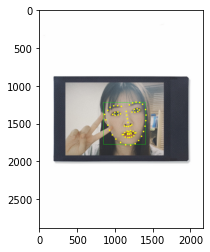

In [10]:
#랜드마크를 이미지에 출력
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[33]) # 코끝 index는 33
    x = landmark[33][0]  # 코끝 x좌표값
    y = landmark[33][1]  # 코끝 y좌표값
    w = h = dlib_rect.width() # 경계박스 너비
    print ('(x,y) : (%d,%d)'%(x,y))  # (x,y) : (3458,1706)
    print ('(w,h) : (%d,%d)'%(w,h))  # (w,h) : (959,959)

(1179, 1538)
(x,y) : (1179,1538)
(w,h) : (556,556)


In [13]:
# 고양이 수염 이미지 불러오기 및  resize하기
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러오기
img_sticker = cv2.resize(img_sticker, (w,h)) # 경계박스 크기에 맞게 resize
print (img_sticker.shape)

(556, 556, 3)


In [14]:
#이미지에서 스티커 좌표 설정
# 수염 이미지의 시작점은 x = x_코끝 -w//2, y=y_코끝 - h//2
refined_x = x - w // 2

refined_y = y - h // 2

print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (901,1260)


In [21]:
# 원본 이미지에 np.where를 사용하여 스티커 적용
#이미지의 좌측상단 좌표부터 우측 하단 좌표까지
#스티커중, 고양이 수염이 있는 부분(255)이면 수염픽셀, 아니면 원본이미지에 위치시키기
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

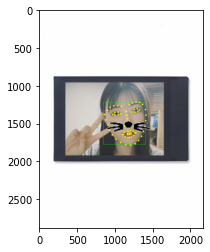

In [16]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

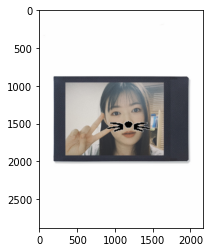

In [17]:
# bounding box와 landmark를 제거하고 최종 결과만 출력
# img_bgr 사용
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

회고:사진의 크기의 해상도가 높아 랜드마크 이미지가 눈에 보이지 않음.랜드마크크기를 다시 크게수정한결과  랜드마크 이미지가 나타남 고양이 스티커가 귀여웟고 재미있는 활동이어서 뜻깊은 시간이었습니다.